In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "2c-data"

# **Logistic Regression**

Logistic regression is an algorithm that estimates the parameters, or coefficients, of the linear combination
of the logit model. The logistic or logit model is used to predict the probability 'p' of a binary dependent variable taking on one of two possible outcomes. This feature makes Logistic Regression useful even in problems of binary classification

**Exploring the Factors Influencing Electric Vehicle Adoption**

In recent years, the push towards sustainable living and reducing carbon footprints has intensified globally. Among the many initiatives aimed at achieving this, the adoption of electric vehicles (EVs) stands out as a critical measure.Car manufacturers have all been actively promoting the transition from traditional gasoline-powered vehicles to electric ones.

To better understand the dynamics of this transition, a comprehensive study was conducted to explore the factors influencing individuals' decisions to adopt electric vehicles.The dataset aims to provide valuable insights into the key predictors that drive or hinder the adoption of EVs.

**Data Dictionary:** <br>
ID: A unique identifier assigned to each individual in the study

Gender: The gender of the individual, categorized as Male or Female.

Age: The age of the individual in years

Annual Income: The annual income of the individual

Electric Vehicle Adoption: A categorical variable indicating whether the individual owns an electric vehicle (0/1). This is the target variable of the study, helping to identify the proportion of adopters and non-adopters.

In [2]:
df <- read.csv("/kaggle/input/2c-data/2c-data.csv")
head(df)

,ID,Gender,Age,Annual_Income,Electric_Vehicle_Adoption
,<int>,<chr>,<int>,<int>,<int>
1,15624510,Male,19,19000,0
2,15810944,Male,35,20000,0
3,15668575,Female,26,43000,0
4,15603246,Female,27,57000,0
5,15804002,Male,19,76000,0
6,15728773,Male,27,58000,0


**1)** Fit a logistic regression model to classify the target variable(Electric Vehicle Adoption)<br>
Hint: Use glm()        (3 marks)
​

In [3]:
df$Gender <- as.factor(df$Gender)

logistic_model <- glm(Electric_Vehicle_Adoption ~ Gender + Age + Annual_Income, data = df, family = binomial())
summary(logistic_model)


Call:
glm(formula = Electric_Vehicle_Adoption ~ Gender + Age + Annual_Income, 
    family = binomial(), data = df)

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -1.278e+01  1.359e+00  -9.405  < 2e-16 ***
GenderMale     3.338e-01  3.052e-01   1.094    0.274    
Age            2.370e-01  2.638e-02   8.984  < 2e-16 ***
Annual_Income  3.644e-05  5.473e-06   6.659 2.77e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 521.57  on 399  degrees of freedom
Residual deviance: 275.84  on 396  degrees of freedom
AIC: 283.84

Number of Fisher Scoring iterations: 6


**2)** What can u interpret from the summary of the model?         (2 marks)

**Interpretation :**

*Statistical Significance:*

1. GenderMale: Not significant (p-value = 0.274).

1. Age: Highly significant (p-value < 2e-16).

1. Annual_Income: Highly significant (p-value = 2.77e-11).


**Model Fit:**

1. Null Deviance: 521.57 on 399 degrees of freedom.

1. Residual Deviance: 275.84 on 396 degrees of freedom. A lower residual deviance = a better fit.

1. AIC (Akaike Information Criterion): 283.84. Lower AIC values = better model fit.

Therefore :

1. Age and Annual Income are significant predictors of electric vehicle adoption. As age and annual income increase, the likelihood of adopting an electric vehicle also increases.

1. Gender does not appear to be a significant predictor in this model.

**3)** Plot the ROC curve and find the AUC value            (3 marks)

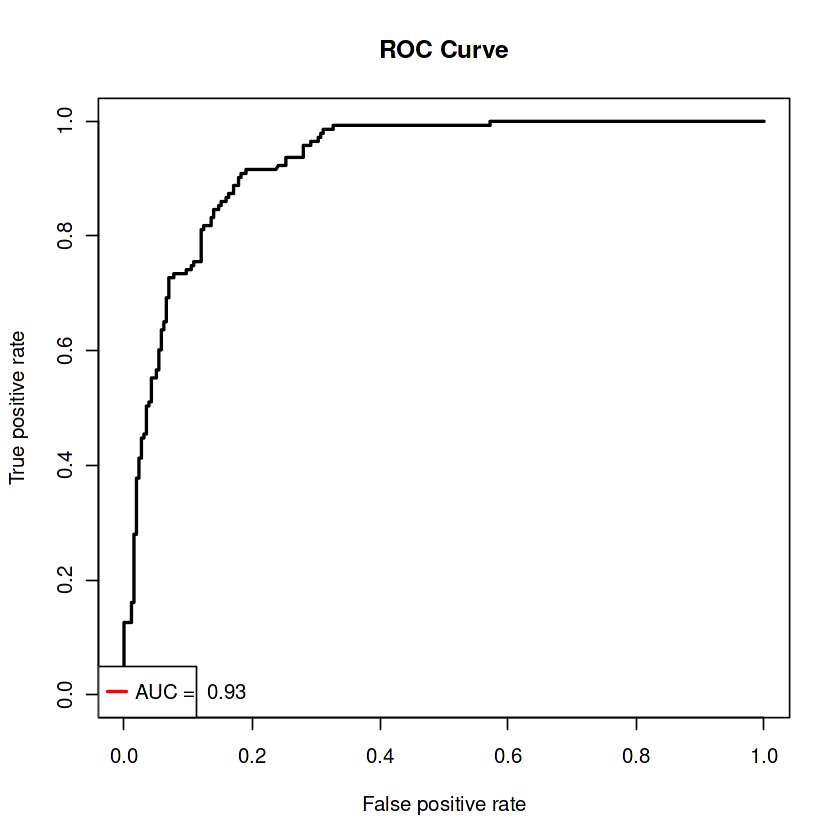

In [4]:
if (!requireNamespace("ROCR", quietly = TRUE)) {
    install.packages("ROCR")
}
library(ROCR)

predictions <- predict(logistic_model, type = "response")

prediction_objects <- prediction(predictions, df$Electric_Vehicle_Adoption)
roc_object <- performance(prediction_objects, measure = "tpr", x.measure = "fpr")

plot(roc_object, main = "ROC Curve", col = "black", lwd = 2)

auc <- performance(prediction_objects, measure = "auc")
auc_value <- auc@y.values[[1]]

legend("bottomleft", legend = paste("AUC = ", round(auc_value, 2)), col = "red", lwd = 2)

**4)** What can you interpret from the ROC curve and AUC value?    (2 marks)

**My Interpretation :**

1. **ROC Curve:** This curve plots the true positive rate (sensitivity) against the false positive rate (1-specificity) at various threshold settings. The curve rises steeply at the beginning and then plateaus, indicating that the classifier performs well at distinguishing between the positive and negative classes for a wide range of thresholds.

2. **AUC Value:** The Area Under the Curve (AUC) is 0.93. This value indicates that the classifier has a very good measure of separability. An AUC of 0.93 means there is a 93% chance that the model will correctly distinguish between the positive and negative classes.

So basically, the classifier represented by this ROC curve and AUC value is highly effective at distinguishing between the two classes. This information can help me evaluate the model's performance and choose an optimal threshold for decision-making.